In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline




# Task 1: Import the data

Load the supplied comma-separated data file (bank_full.csv).
A correctly imported file has a Total number of records : 45,211 records with 17 columns


In [2]:
df_raw = pd.read_csv('bank_full.csv')

In [3]:
df_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,take_up
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [4]:
df_raw.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,take_up
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [5]:
df_raw.shape

(45211, 17)

# Task 2 : Explore the relationship between some of the variables.
An example plot could be a histogram of a particular field (such as the histogram of income plotted below) or a scatter plot to indicating the relationship between variables. Don’t spend too long on these plots, they needn’t be beautiful nor do they need to be exhaustive. The idea is simply to demonstrate that you can visualize relationships in the dataset.


age
default
balance
housing
loan
day
duration
campaign
pdays
previous
take_up


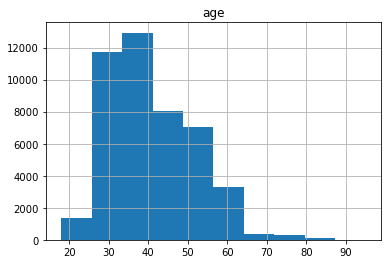

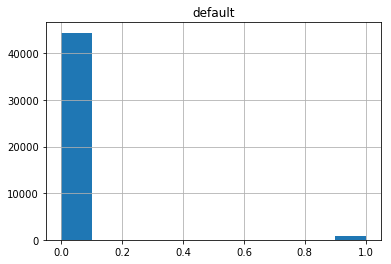

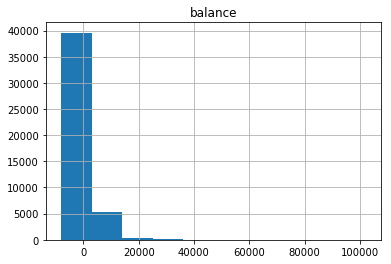

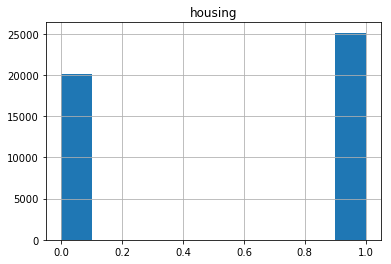

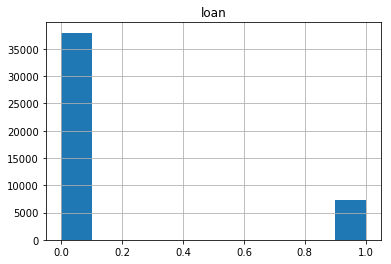

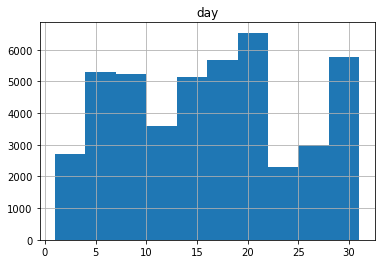

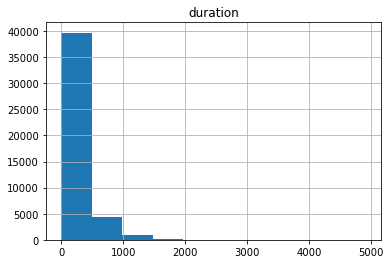

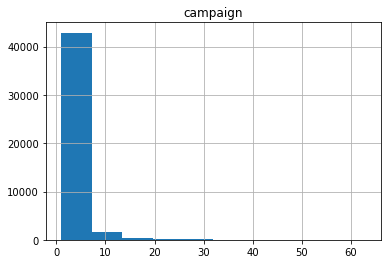

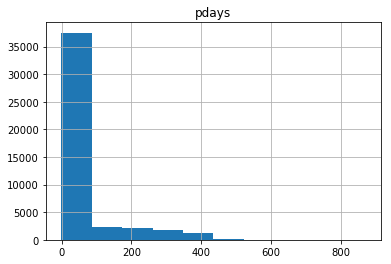

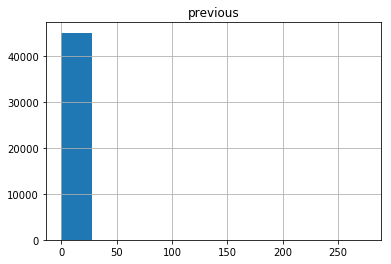

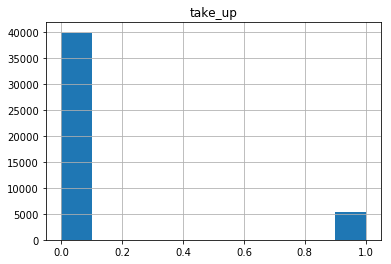

In [6]:
# take only numerical columns for plotting purpose
df_numerical = df_raw.select_dtypes(exclude=['object'])
for columns in df_numerical:
    print(columns)
    pd.DataFrame.hist(df_numerical, column=columns)

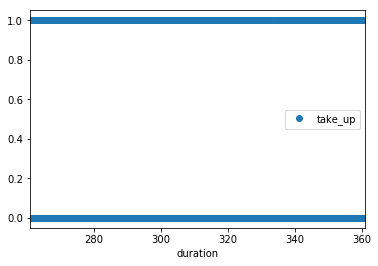

In [7]:
df_raw.plot(x='duration', y='take_up', style='o')

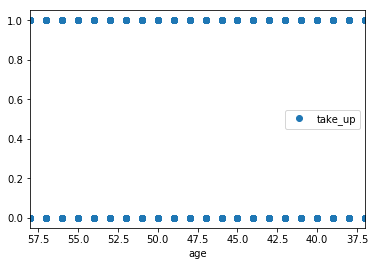

In [8]:
df_raw.plot(x='age', y='take_up', style='o')

C:\Users\atish\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


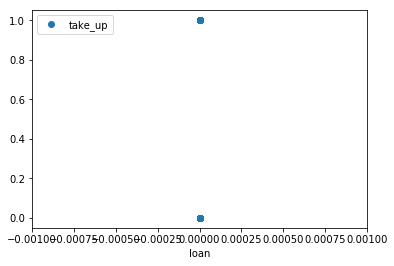

In [9]:
df_raw.plot(x='loan', y='take_up', style='o')

# Task 3:  Convert the categorical values to numerical values
Convert the categorical values to dummy variables and replot some of the relationships


In [10]:
# re-encode the categorical variables

In [11]:
df_raw.job = LabelEncoder().fit_transform(df_raw.job)
df_raw.marital = LabelEncoder().fit_transform(df_raw.marital)
df_raw.education = LabelEncoder().fit_transform(df_raw.education)
df_raw.month = LabelEncoder().fit_transform(df_raw.month)
df_raw.contact = LabelEncoder().fit_transform(df_raw.contact)
df_raw.poutcome = LabelEncoder().fit_transform(df_raw.poutcome)

In [12]:
df_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,take_up
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# Task 4: Test and training data sets
In order to evaluate this model (the next step) you will need to create a backtesting or hold-out set which you will not use to fit the model with. Use a holdout sample of 20%.


In [13]:
df_raw.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'take_up'],
      dtype='object')

In [14]:
#split the outcome and input variables
X = df_raw.iloc[:, :-1]
y = df_raw.iloc[:, -1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=201707)

# Task 5: Run the model of choice.
Using the newly created dataset on the above transformations. Run a model of your choice that will allow us to predict the take up of campaign products.


In [16]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X_train, y_train)

# Task 6: Use this model to now predict the take-up in the hold out sample

In [17]:
# check the accuracy on the training set
scores = model.score(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
#logistic AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)


#print(metrics.auc(fpr, tpr))
print("Logistic AUC = %2.6f" % logit_roc_auc)
print(metrics.classification_report(y_test,y_pred ))


print("Accuracy :" + str(scores.mean()))
#print("Std Dev: " + str(scores.std()))

print("Logistic accuracy is %2.2f" % metrics.accuracy_score(y_test, y_pred))

Logistic AUC = 0.606943
             precision    recall  f1-score   support

          0       0.91      0.98      0.94      7975
          1       0.59      0.24      0.34      1068

avg / total       0.87      0.89      0.87      9043

Accuracy :0.890317407653
Logistic accuracy is 0.89


# Task 7: Create a cumulative gains chart 
Calculate the area under the curve (AUC) for the test data and generate a confusion matrix to understand the impact of the predictions. 


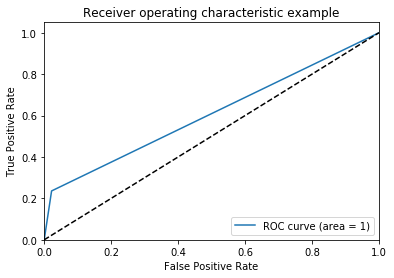

In [19]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [20]:
print(metrics.confusion_matrix(y_test, y_pred))

[[7799  176]
 [ 816  252]]
